# Context:
The data set has information about features of silhouette extracted from the images of different cars
Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 
cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars 
would be readily distinguishable, but it would be more difficult to distinguish between the cars.

Here let's apply Hierarchial Clustering

- Compactness is defined as the ratio of the area of an object to the area of a circle with the same perimeter. – A circle is used as it is the object with the most compact shape. – Objects which have an elliptical shape, or a boundary that is irregular rather than smooth, will decrease the measure


- Circularity - The circularity measure is used extensively in image analysis to sort or identify objects. It has also been used to analyze the gerrymandering of legislative districts and proposed as a way to zone irregular land parcels


- Aspect Ratio - The aspect ratio of a geometric shape is the ratio of its sizes in different dimensions


- Elongatedness - In image processing, elongatedness for a region is the ratio between the length and width of the minimum bounding rectangle of the region


- Radius of gyration



### Import libraries and Read the dataset using function .dropna() - to avoid dealing with NAs

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('vehicle-1.csv').dropna()

In [3]:
%matplotlib inline
# import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#### Step 1 - Cleaning the data. 1. Missing Value Treatment 2.Outlier Treatment 3.Remove correlated variable

In [4]:
df.shape

(813, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  813 non-null    int64  
 1   circularity                  813 non-null    float64
 2   distance_circularity         813 non-null    float64
 3   radius_ratio                 813 non-null    float64
 4   pr.axis_aspect_ratio         813 non-null    float64
 5   max.length_aspect_ratio      813 non-null    int64  
 6   scatter_ratio                813 non-null    float64
 7   elongatedness                813 non-null    float64
 8   pr.axis_rectangularity       813 non-null    float64
 9   max.length_rectangularity    813 non-null    int64  
 10  scaled_variance              813 non-null    float64
 11  scaled_variance.1            813 non-null    float64
 12  scaled_radius_of_gyration    813 non-null    float64
 13  scaled_radius_of_gyr

In [6]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


### Print/ Plot the dependent (categorical variable) and Check for any missing values in the data

In [7]:
#Since the variable is categorical, you can use value_counts function
pd.value_counts(df['class'])

car    413
bus    205
van    195
Name: class, dtype: int64

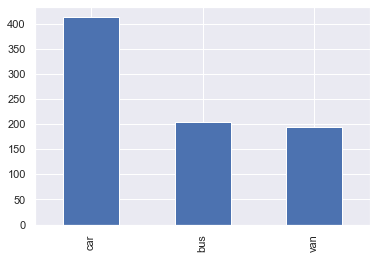

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.value_counts(df["class"]).plot(kind="bar")

In [9]:
df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

#### Pair plot for all the features

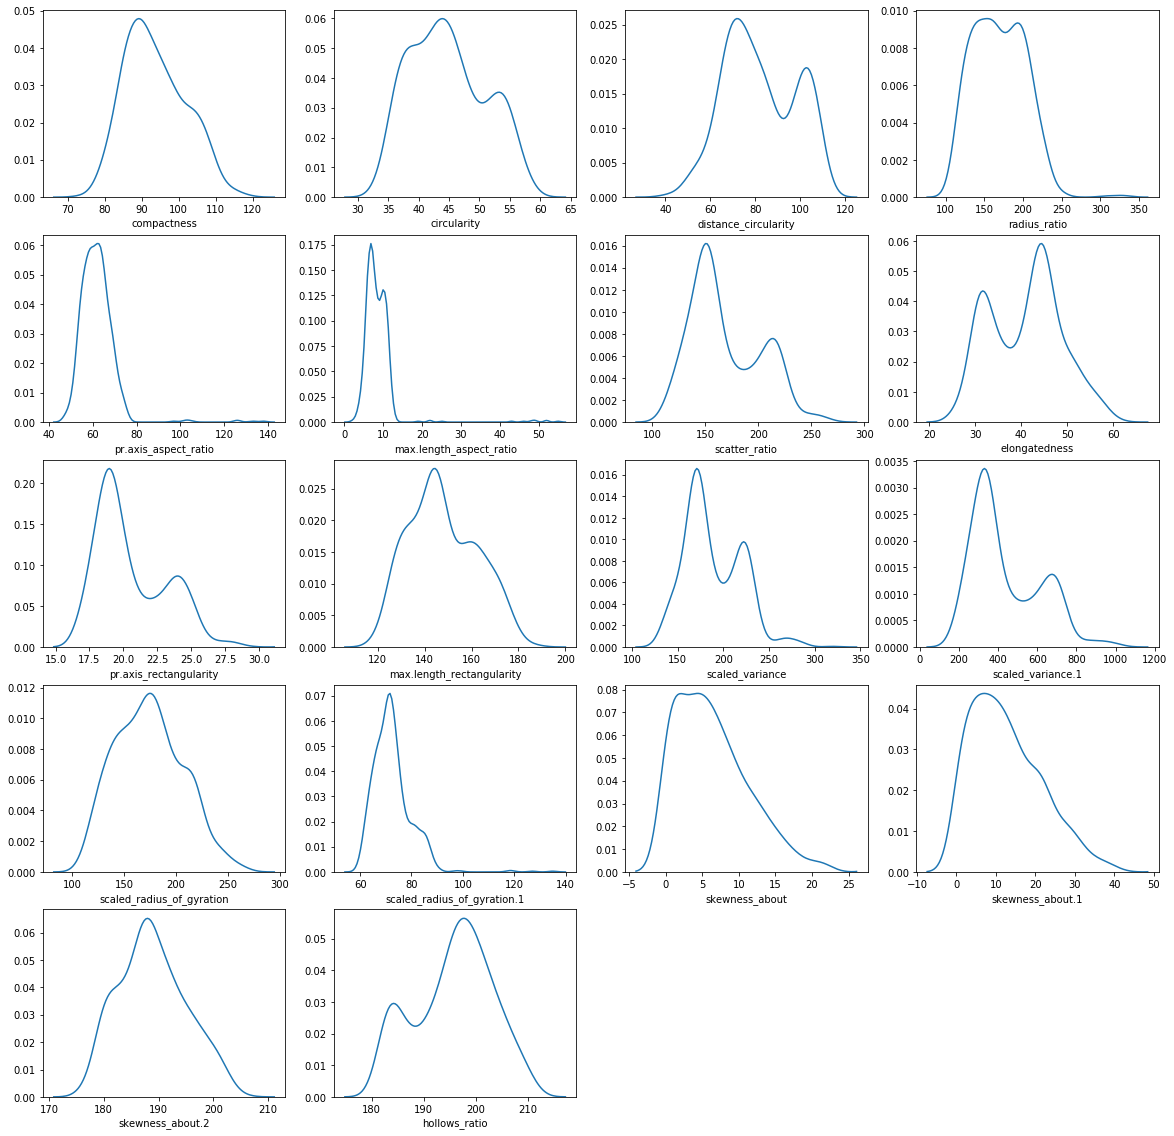

In [10]:
import seaborn as sns

plt.figure(figsize=(20,20))
pos = 1

for i in df.columns[df.columns!='class']:
    plt.subplot(5, 4, pos)
    sns.distplot(df[i],hist=False,)
    pos += 1 
    

#### Boxplot to Check for Outlier

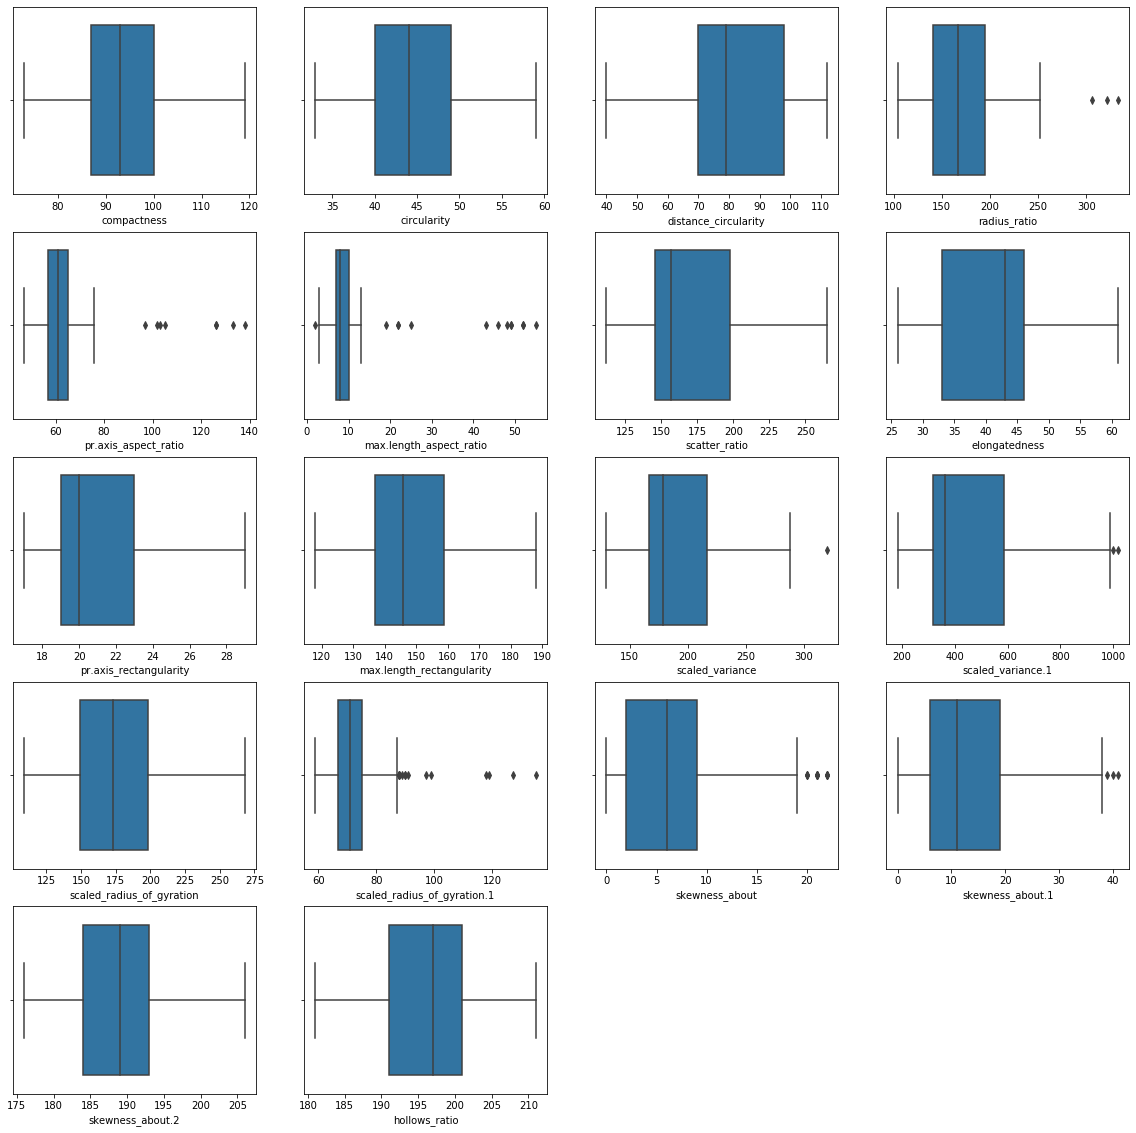

In [11]:
plt.figure(figsize=(20,20))
pos = 1
for i in df.columns[df.columns!='class']:
    plt.subplot(5, 4, pos)
    sns.boxplot(df[i])
    pos += 1 

#### Outlier Treatment - Note all columns are considered here. If a column have an outlier, the if else condition won't hold true

In [12]:
for i in df.columns[df.columns!='class']:
    q1, q2, q3 = df[i].quantile([0.25,0.5,0.75])
    IQR = q3 - q1
    lower_cap=q1-1.5*IQR
    upper_cap=q3+1.5*IQR
    df[i]=df[i].apply(lambda x: upper_cap if x>(upper_cap) else (lower_cap if x<(lower_cap) else x))

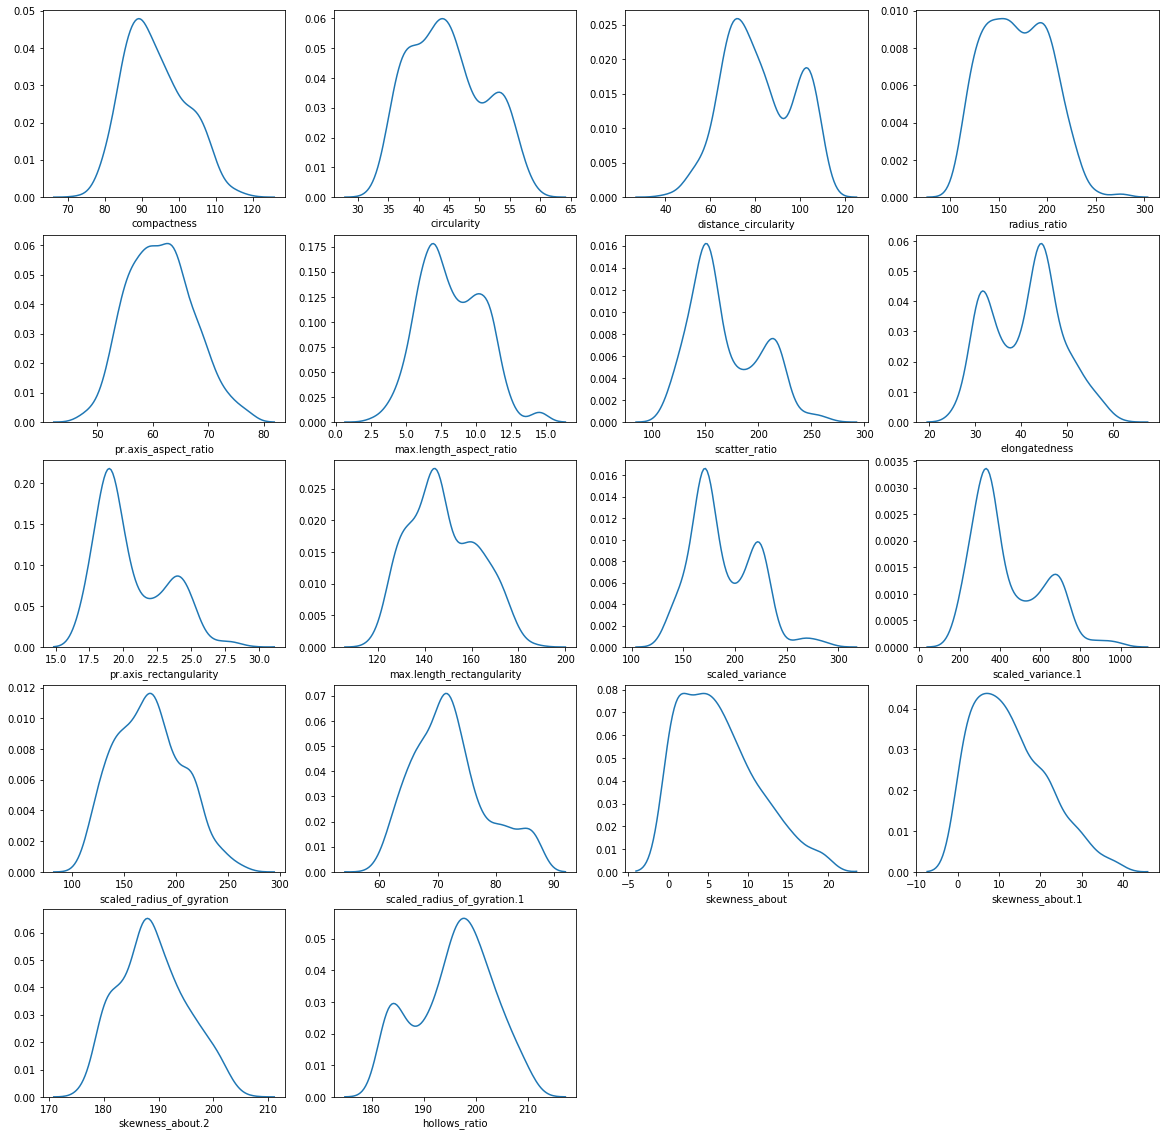

In [13]:
plt.figure(figsize=(20,20))
pos = 1

for i in df.columns[df.columns!='class']:
    plt.subplot(5, 4, pos)
    sns.distplot(df[i],hist=False,)
    pos += 1 

#### Checking for highly correlated variables

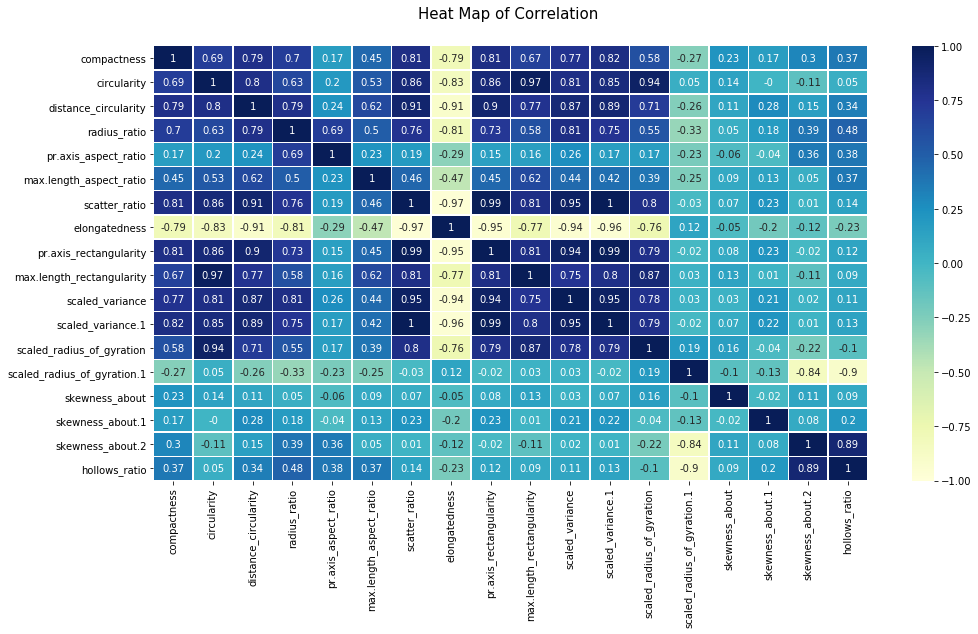

In [14]:
#---------------------------------------Getting Correlation Data----------------------------------------
coor_chd_data = df.corr().round(2);

fig, ax = plt.subplots()
fig.set_size_inches(16, 8)

#--------------------------------------Plotting a heat map of different variables---------------------------------
plt.title('Heat Map of Correlation \n',fontsize=15, pad=10)

sns.heatmap(coor_chd_data,annot=True,cmap='YlGnBu',vmin=-1,vmax=1, linewidths=.5, center=0);

In [15]:
df_upd=df.drop(columns = {'scatter_ratio', 'hollows_ratio','circularity', 'scaled_variance', 'pr.axis_rectangularity', 
                          'scaled_variance.1', 'max.length_rectangularity', 'distance_circularity', 'elongatedness',
                          'radius_ratio', 'skewness_about.2'})

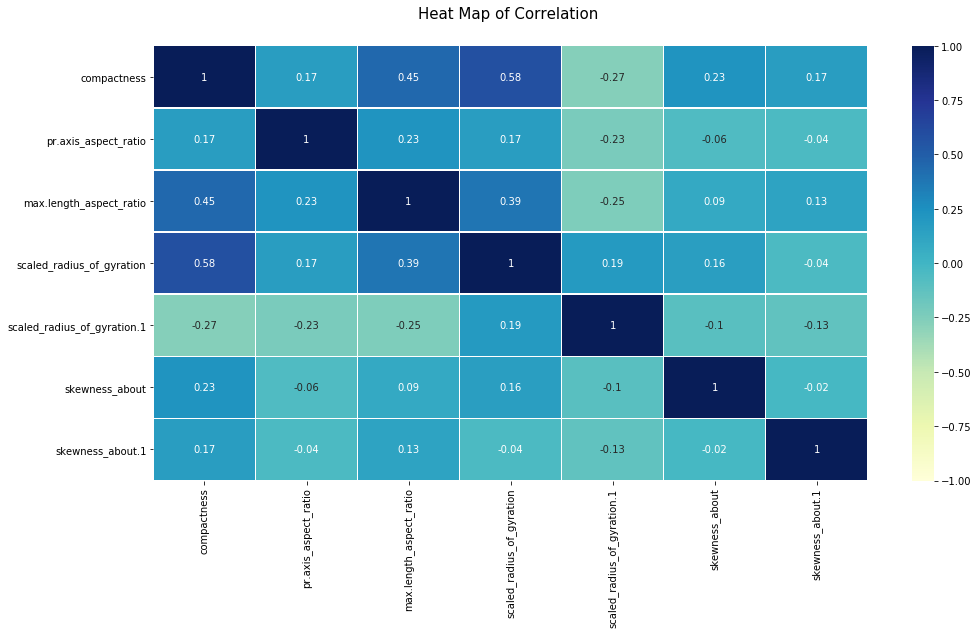

In [16]:
#---------------------------------------Getting Correlation Data----------------------------------------
coor_chd_data = df_upd.corr().round(2);

fig, ax = plt.subplots()
fig.set_size_inches(16, 8)

#--------------------------------------Plotting a heat map of different variables---------------------------------
plt.title('Heat Map of Correlation \n',fontsize=15, pad=10)

sns.heatmap(coor_chd_data,annot=True,cmap='YlGnBu',vmin=-1,vmax=1, linewidths=.5, center=0);

#### Step 2 - Standardize the data

#### Standardize the data

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods. You can use zscore function to do this

In [17]:
interest_df = df_upd.drop('class', axis=1)

In [18]:
from scipy.stats import zscore
interest_df_z = interest_df.apply(zscore)

In [19]:
interest_df_z.head()

,compactness,pr.axis_aspect_ratio,max.length_aspect_ratio,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1
0,0.163231,1.814935,0.801865,0.301676,-0.336861,-0.067703,0.372602
1,-0.322874,-0.750630,0.351180,-0.502972,-0.025824,0.550749,0.148005
2,1.256966,0.788709,0.801865,1.415804,0.129694,1.581501,-0.413488
3,-0.079822,0.275596,0.351180,-1.462359,-1.425488,-0.067703,-0.301190
4,-1.052030,2.670123,2.829947,0.425468,2.306950,0.550749,-0.188891


In [20]:
from sklearn.preprocessing import StandardScaler
import numpy as np

sc = StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(interest_df),columns=interest_df.columns)

In [21]:
X_std.head()

,compactness,pr.axis_aspect_ratio,max.length_aspect_ratio,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1
0,0.163231,1.814935,0.801865,0.301676,-0.336861,-0.067703,0.372602
1,-0.322874,-0.750630,0.351180,-0.502972,-0.025824,0.550749,0.148005
2,1.256966,0.788709,0.801865,1.415804,0.129694,1.581501,-0.413488
3,-0.079822,0.275596,0.351180,-1.462359,-1.425488,-0.067703,-0.301190
4,-1.052030,2.670123,2.829947,0.425468,2.306950,0.550749,-0.188891


#### Step 3 - Plot dendogram and Cophenetic Coefficient for multiple linkage. We will use euclidean distance here and try different linkage method

In [22]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [23]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

Cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram. Closer it is to 1, the better is the clustering.

It usually takes all possible pairs of points in the data and calculates the eucledean distance between the points. (This remains same, irrespective of which linkage algorithm we chose). It then computes the dendogramic distance at which C & D combines.

So it calculates the correlation between, the actual distance of two points and their cluster distance, i.e. if two points are far off then they should be stored in two separate cluster. Which means the cluster distance should also be far off. Hence a correlation closer to 1 is good.

<b> List of distance metrics that can be combined with different linkage method. </b>

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist

<b> Details about Linkage function </b>

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage

<b> Details about Cophenetic Coefficient </b>

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.cophenet.html#scipy.cluster.hierarchy.cophenet

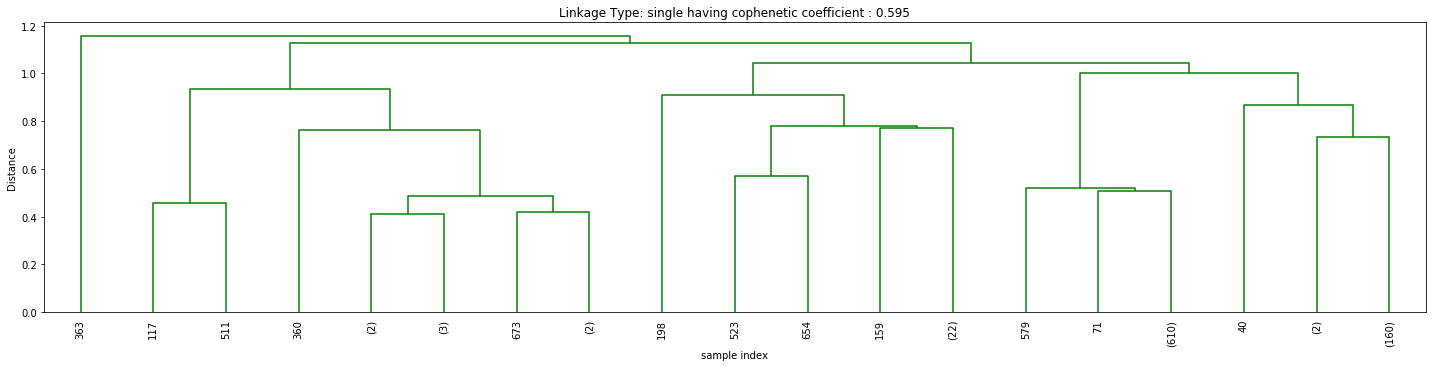

single 0.595407911575909


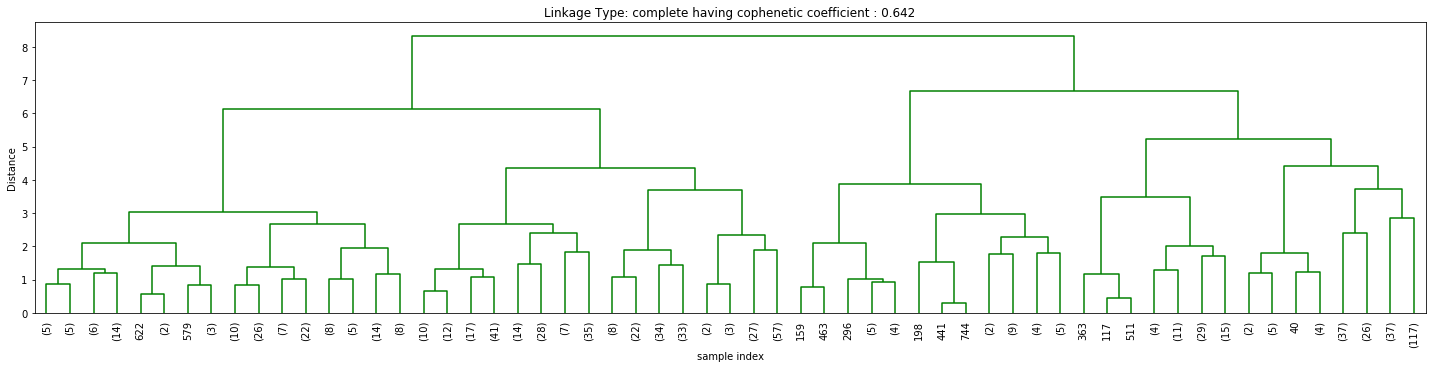

complete 0.6419030705863575


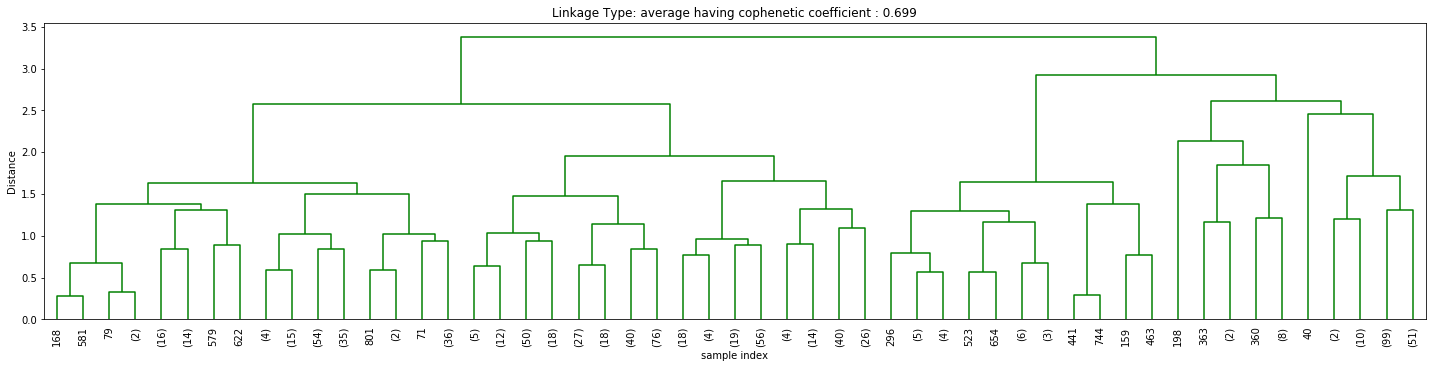

average 0.6993945273108203


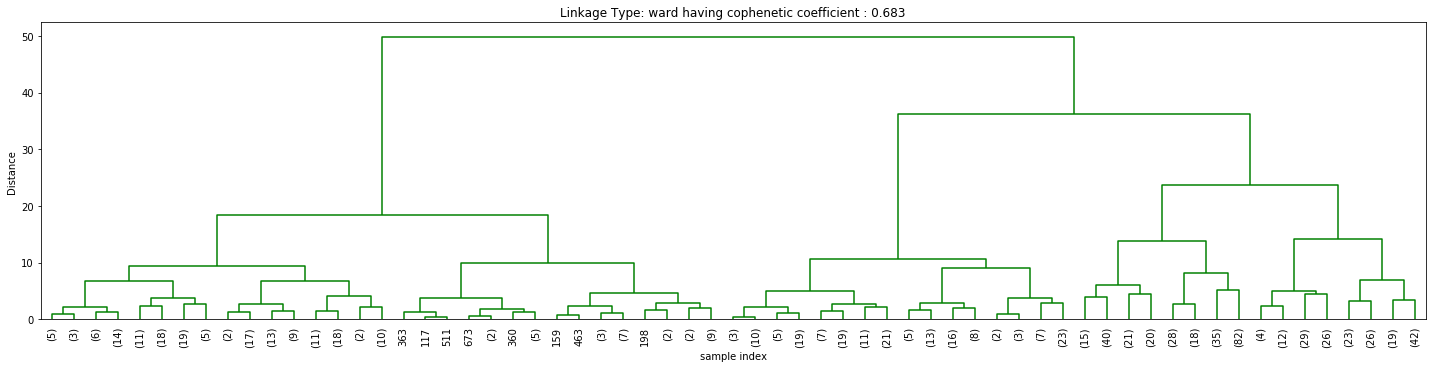

ward 0.6832440134842912


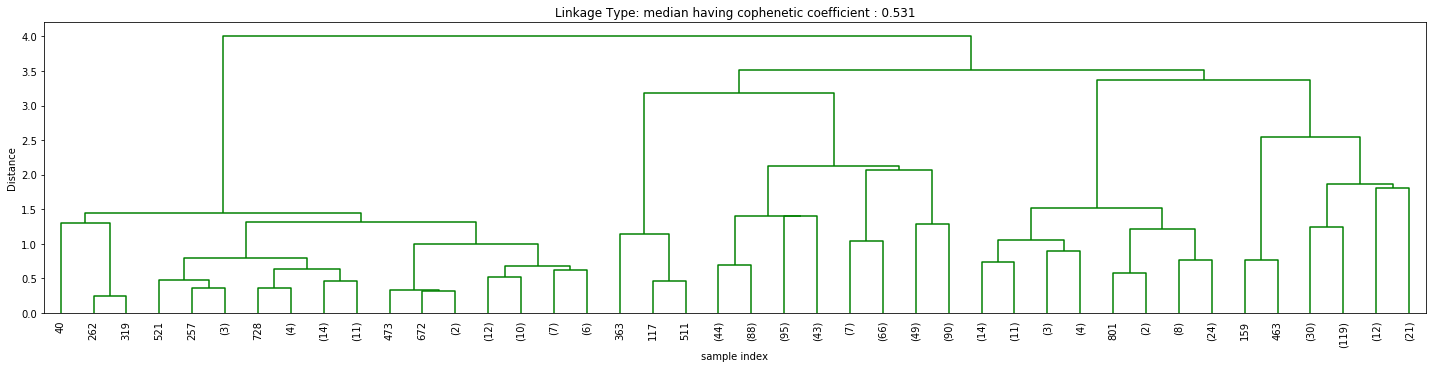

median 0.5310422863241115


In [65]:
linkage_methods=['single','complete','average','ward','median']

results_cophenetic_coef=[]

for i in linkage_methods:
    
    plt.figure(figsize=(20, 5))
    
    plt.xlabel('sample index')
    plt.ylabel('Distance')
    
    Z = linkage(X_std, i)
    
    cc,cophn_dist=cophenet(Z,pdist(X_std))
    
    dendrogram(Z,leaf_rotation=90.0,p=5,leaf_font_size=10,truncate_mode='level',color_threshold=60)
    
    #Z - is the linkage matrix
    #leaf_rotation - Angle of leaf labels. Check how data is displayed in the x axis in the image below
    #p - No more than p levels of the dendrogram tree are displayed. 
    #A “level” includes all nodes with p merges from the last merge.
    
    
    plt.tight_layout()
    
    plt.title("Linkage Type: "+ i +" having cophenetic coefficient : "+str(round(cc,3)) )
    
    plt.show()
    results_cophenetic_coef.append((i,cc))
    print (i,cc)

In [25]:
results_cophenetic_coef_df=pd.DataFrame(results_cophenetic_coef,columns=['LinkageMethod','CopheneticCoefficient'])
results_cophenetic_coef_df

,LinkageMethod,CopheneticCoefficient
0,single,0.466962
1,complete,0.488190
2,average,0.627243
3,ward,0.521247
4,median,0.434381


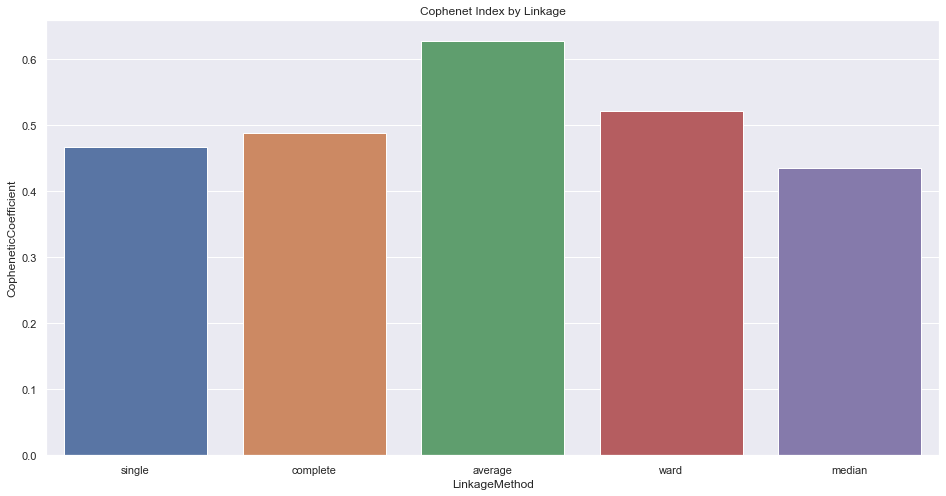

In [68]:
sns.set(color_codes=True)
fig, ax = plt.subplots(figsize=(16,8)); #---Size of convas
plt.title("Cophenet Index by Linkage");
sns.barplot(results_cophenetic_coef_df['LinkageMethod'],results_cophenetic_coef_df['CopheneticCoefficient']); #--bar graph

In [26]:
Z = linkage(X_std, metric='euclidean', method='average')

#### Let's understand what p in dendogram signify by plotting values of p from 1 to 5

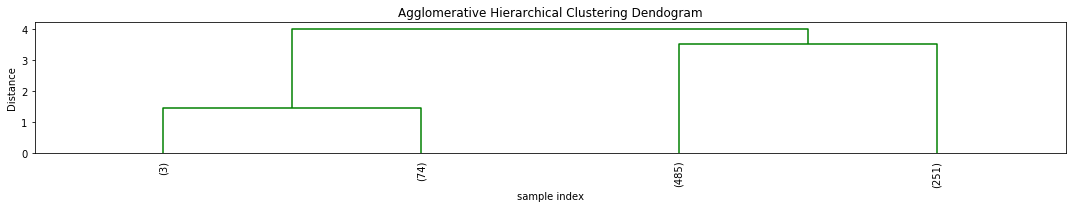

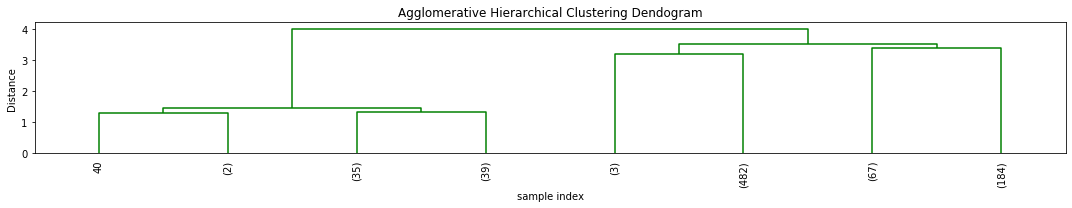

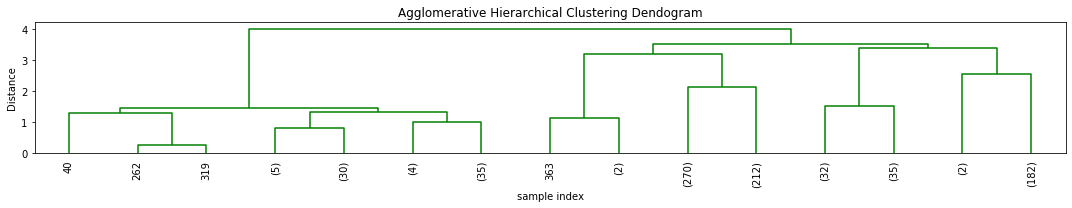

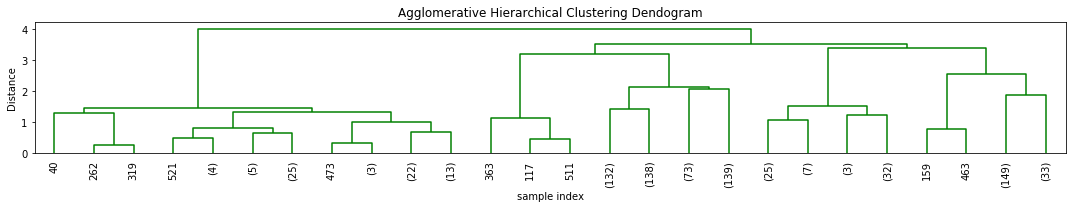

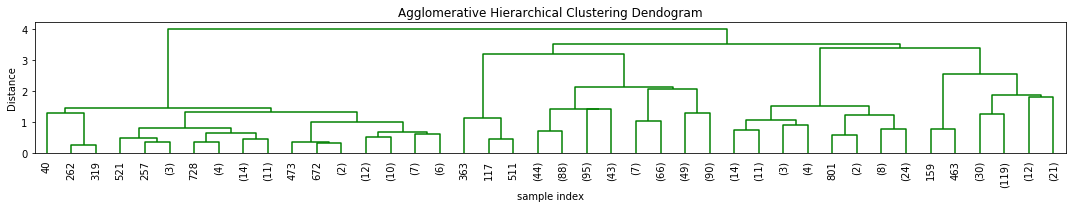

In [66]:
for i in range(1,6):
    plt.figure(figsize=(15, 3))
    plt.title('Agglomerative Hierarchical Clustering Dendogram')
    plt.xlabel('sample index')
    plt.ylabel('Distance')
    dendrogram(Z,leaf_rotation=90.0,p=i,leaf_font_size=10,truncate_mode='level',color_threshold=60)
    plt.tight_layout()

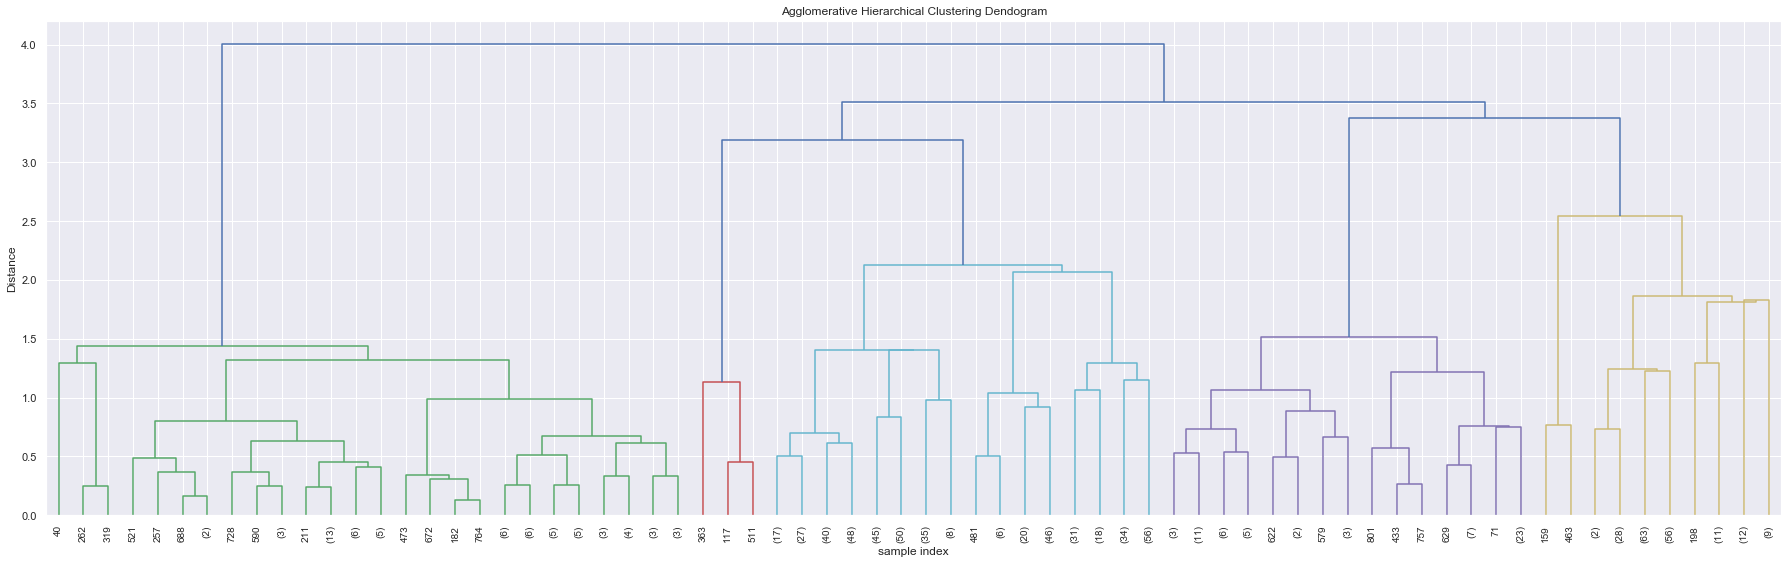

In [69]:
plt.figure(figsize=(25, 8))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,leaf_rotation=90.0,p=6,leaf_font_size=10,truncate_mode='level', color_threshold=3)
plt.tight_layout()

#### Step 4- Clustering the data

#### Clustering Exercise

In [29]:
from sklearn.cluster import AgglomerativeClustering 

1. n_clustersint or None, default=2, The number of clusters to find. It must be None if distance_threshold is not None


2. affinitystr or callable, default=’euclidean’. Metric used to compute the linkage. Can be “euclidean”, “manhattan”. If linkage is “ward”, only “euclidean” is accepted. If “precomputed”, a distance matrix (instead of a similarity matrix) is needed as input for the fit method

3. linkage{“ward”, “complete”, “average”, “single”}, default=”ward”

Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

- ward minimizes the variance of the clusters being merged.

- average uses the average of the distances of each observation of the two sets

- complete or maximum linkage uses the maximum distances between all observations of the two sets.

- single uses the minimum of the distances between all observations of the two sets.

In [70]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean',  linkage='average')

In [71]:
model.fit(X_std)

AgglomerativeClustering(linkage='average', n_clusters=5)

In [72]:
df['labels'] = model.labels_
df.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class,labels
0,95,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van,3
1,91,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van,3
2,104,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car,0
3,93,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van,3
4,85,44.0,70.0,205.0,77.0,14.5,149.0,45.0,19.0,144,241.0,325.0,188.0,87.0,9.0,11.0,180.0,183,bus,1
6,97,43.0,73.0,173.0,65.0,6.0,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus,3
7,90,43.0,66.0,157.0,65.0,9.0,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van,3
8,86,34.0,62.0,140.0,61.0,7.0,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van,3
10,86,36.0,70.0,143.0,61.0,9.0,133.0,50.0,18.0,130,153.0,266.0,127.0,66.0,2.0,10.0,194.0,202,van,3
11,90,34.0,66.0,136.0,55.0,6.0,123.0,54.0,17.0,118,148.0,224.0,118.0,65.0,5.0,26.0,196.0,202,car,3


#### Calculating Silhouette Scores for different number of clusters

In [73]:
# Calculate Avg Silhoutte Score
from sklearn.metrics import silhouette_score
silhouette_score(X_std, df['labels'])

0.3918187536411668

In [74]:
for i in range(2,10):
    model = AgglomerativeClustering(n_clusters=i, affinity='euclidean',  linkage='average')
    model.fit(X_std)
    df['labels'] = model.labels_
    print("K=",i,"-",silhouette_score(X_std, df['labels']))

K= 2 - 0.4200804470735341
K= 3 - 0.3905981408171409
K= 4 - 0.3869293998113843
K= 5 - 0.3918187536411668
K= 6 - 0.3716751108484793
K= 7 - 0.35691375784048573
K= 8 - 0.3574586693317929
K= 9 - 0.35861173965021637


Silhouette Score is better when closer 1 and worse when closer to -1

here, it is not so great.

#### Step 5 - Visualize the clusters

In [102]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean',  linkage='average')
model.fit(X_std)

AgglomerativeClustering(linkage='average', n_clusters=5)

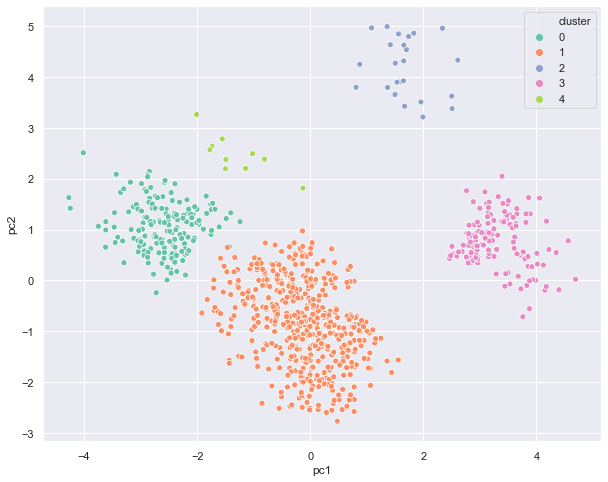

In [103]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
principalComponents = pca.fit_transform(X_std)
X_std = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])



X_std['cluster']=model.labels_
X_std.head()
plt.figure(figsize=(10,8))
sns.scatterplot(x=X_std.pc1, y=X_std.pc2, hue=X_std.cluster, palette="Set2")


In [77]:
X_std['cluster'].value_counts()

0    612
1    163
2     25
3     13
Name: cluster, dtype: int64

#### We dropped a lot of variables. We will now try and combine the variables and see if we can cluster better.

#### Step 6 - Use PCA or principal component to reduce dimension and redo the clustering exercise

#### We will go back and use the original data and scale it

In [78]:
pca_df = df.drop('class', axis=1)

In [79]:
from sklearn.preprocessing import StandardScaler
import numpy as np

sc = StandardScaler()
pca_std = pd.DataFrame(sc.fit_transform(pca_df),columns=pca_df.columns)

In [80]:
pca_std.shape

(813, 19)

<b> If data has 19 dimensions then we can have 19 Principal Components, but not all Components will explain the variance of the data equally well </b>

In [81]:
from sklearn.decomposition import PCA

pca=PCA(n_components=19)

principalComponents = pca.fit_transform(pca_std)

variance=pca.explained_variance_ratio_

print("Variance explained by each component")

j=1
for i in variance:
    print("PC",j,":",(i*100))
    j+=1


Variance explained by each component
PC 1 : 54.45889547272027
PC 2 : 17.417958170894483
PC 3 : 6.478646807539075
PC 4 : 6.302774493106705
PC 5 : 4.5065433263718
PC 6 : 3.9733843617753712
PC 7 : 2.09770942576799
PC 8 : 1.452957596541782
PC 9 : 1.1690869876841323
PC 10 : 0.5289877731213399
PC 11 : 0.49642224963553977
PC 12 : 0.3166027927485155
PC 13 : 0.2542086807993507
PC 14 : 0.2076771203827329
PC 15 : 0.1393233124076075
PC 16 : 0.09642726448832563
PC 17 : 0.06709986068372528
PC 18 : 0.033388049679848535
PC 19 : 0.001906253651384349


In [82]:
data_var = pd.DataFrame(variance).reset_index()
data_var[0]=round(data_var[0]*100,2)
data_var.head()

,index,0
0,0,54.46
1,1,17.42
2,2,6.48
3,3,6.30
4,4,4.51


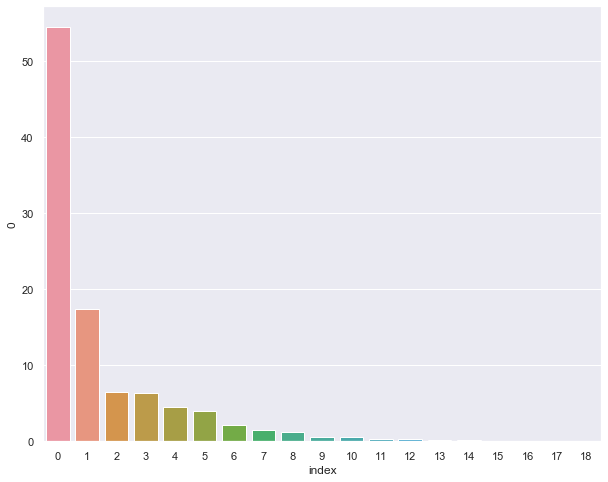

In [83]:
plt.figure(figsize=(10,8));
sns.barplot(x=data_var['index'],y=data_var[0]);

In [84]:
pca=PCA(n_components=6)

principalComponents = pca.fit_transform(pca_std)

pca_std = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2','pc3','pc4','pc5','pc6'])

In [85]:
pca_std.head()

,pc1,pc2,pc3,pc4,pc5,pc6
0,0.731415,-0.600097,0.590032,-0.962901,-0.990312,1.095781
1,-1.577499,-0.394312,-1.015856,0.263293,-0.573700,0.222630
2,4.100969,0.267618,-0.705972,-0.986314,0.651122,0.849789
3,-1.573127,-2.996030,-0.214446,-0.267551,-0.511801,-0.437384
4,-0.721025,2.239766,2.688878,-1.921802,-1.215594,3.885095


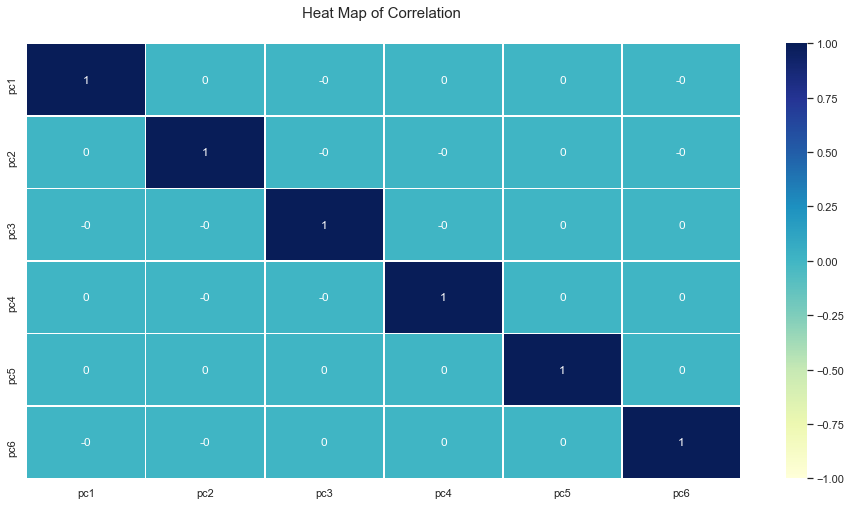

In [86]:
coor_chd_data = pca_std.corr().round(2);

fig, ax = plt.subplots()
fig.set_size_inches(16, 8)

#--------------------------------------Plotting a heat map of different variables---------------------------------
plt.title('Heat Map of Correlation \n',fontsize=15, pad=10)

sns.heatmap(coor_chd_data,annot=True,cmap='YlGnBu',vmin=-1,vmax=1, linewidths=.5, center=0);

In [87]:
Z = linkage(pca_std, metric='euclidean', method='average')

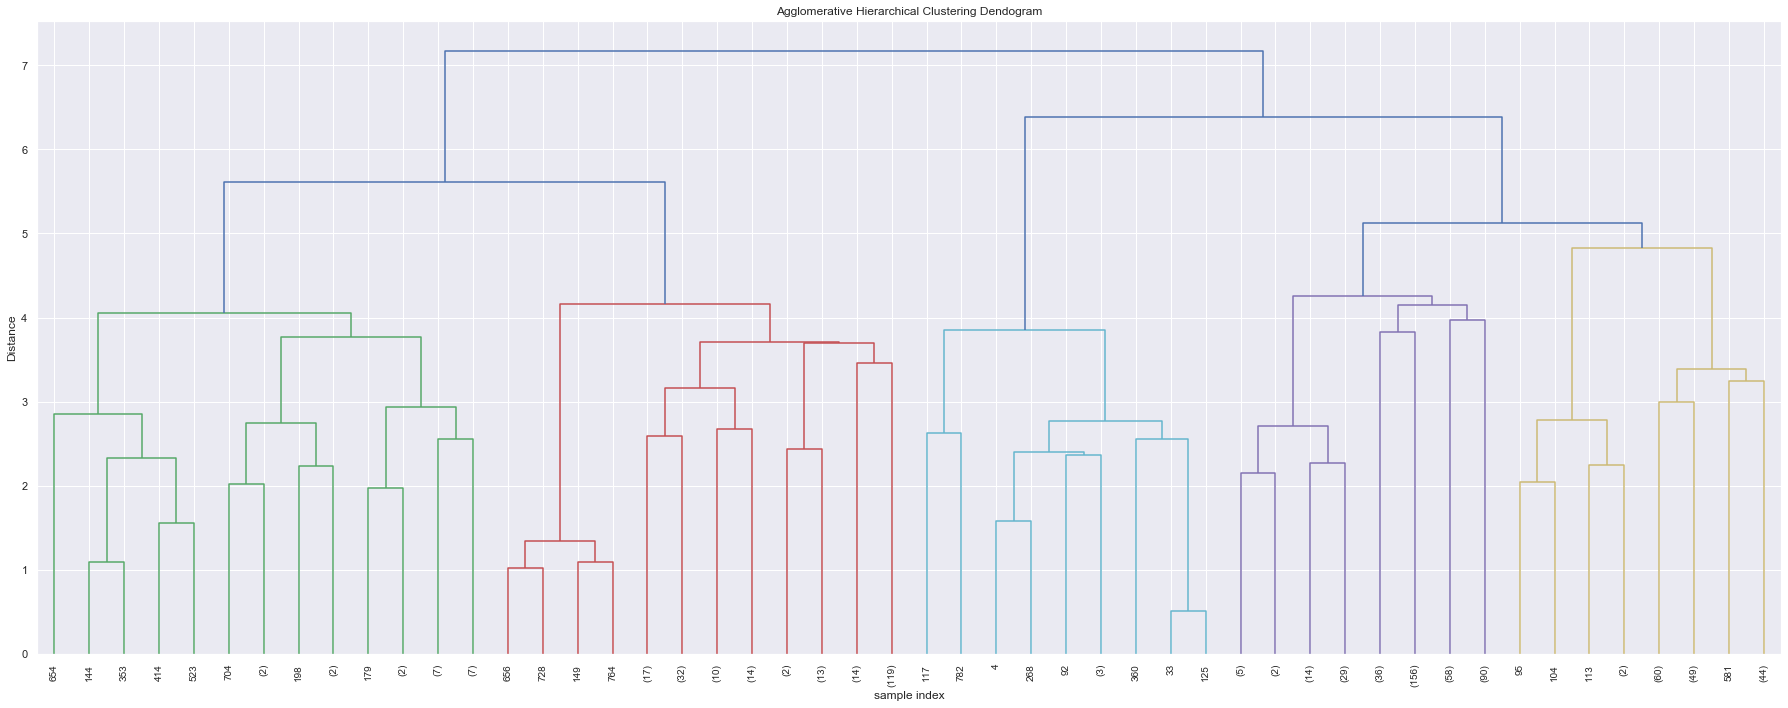

In [88]:
plt.figure(figsize=(25, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,leaf_rotation=90.0,p=5,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [89]:
pca_std['labels'] = model.labels_

In [90]:
for i in range(3,10):
    model = AgglomerativeClustering(n_clusters=i, affinity='euclidean',  linkage='average')
    model.fit(pca_std)
    pca_std['labels'] = model.labels_
    print("K=",i,"-",silhouette_score(pca_std, pca_std['labels']))

K= 3 - 0.34507570241262975
K= 4 - 0.337296868182442
K= 5 - 0.40599852029335853
K= 6 - 0.3041399231179659
K= 7 - 0.3243706436771646
K= 8 - 0.3262366843434126
K= 9 - 0.3415730074452818


In [104]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean',  linkage='average')
model.fit(pca_std)

AgglomerativeClustering(linkage='average', n_clusters=5)

In [105]:
 pca_std['labels'] = model.labels_

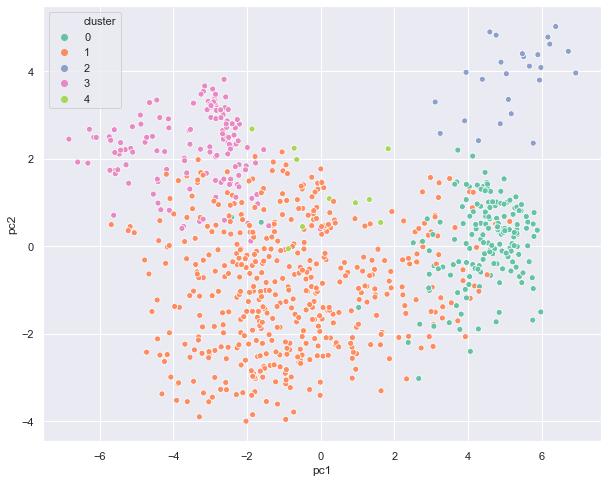

In [106]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=pca_std.pc1, y=pca_std.pc2, hue=X_std.cluster, palette="Set2")


In [107]:
pca_std['labels'].value_counts()

1    391
4    224
0    159
3     28
2     11
Name: labels, dtype: int64